In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [237]:
health_care=pd.read_csv(r"C:\Users\PC\Desktop\healthcare-dataset-stroke-data.csv")

# 1.Exploratory Data Analysis

In [238]:
health_care.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Check Data type of Columns

In [239]:
health_care.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Next, examine the data types of the columns. While the majority are numeric, a few columns have string data types, classified as 'object' in Python's pandas library. These columns with the 'object' data type can be treated as categorical.

# check if the variables are numerical or Categorical

In [240]:
for i in ["hypertension","heart_disease","stroke"]:
    print(f"unique values of {i} are:{health_care[i].unique().tolist()}")

unique values of hypertension are:[0, 1]
unique values of heart_disease are:[1, 0]
unique values of stroke are:[1, 0]


# Calculating Summary Statistics

In [241]:
desc_table=health_care.describe().T

In [242]:
desc_table

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [243]:
desc_table["CV"]=desc_table["std"]/desc_table["mean"]
desc_table

,count,mean,std,min,25%,50%,75%,max,CV
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00,0.579490
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00,0.523119
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00,3.043494
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00,4.185442
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74,0.426609
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60,0.271831
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00,4.418813


since no column has a CV close to or equal to 0, it implies that there is considerable variability in the data. Which is good!!!

# Check the data balance

In [244]:
health_care["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

 the model might become biased towards the majority class (0) and perform poorly in detecting the minority class (1).

# 2. Data Preparation

# Dropping redundant variables

In [245]:
health_care.drop('id',axis=1,inplace=True)

In [246]:
health_care

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [247]:
health_care.iloc[3359]

gender                     Female
age                          23.0
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                 Private
Residence_type              Urban
avg_glucose_level           59.07
bmi                          21.6
smoking_status       never smoked
stroke                          0
Name: 3359, dtype: object

# Cheking missing values

In [248]:
health_care.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [249]:
health_care["bmi"]

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [250]:
health_care.isna().sum()[health_care.isna().sum()>0]

bmi    201
dtype: int64

**we will impute missing values with median**

In [251]:
health_care["bmi"]=health_care["bmi"].fillna(health_care["bmi"].median())

In [252]:
health_care.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Axes: >

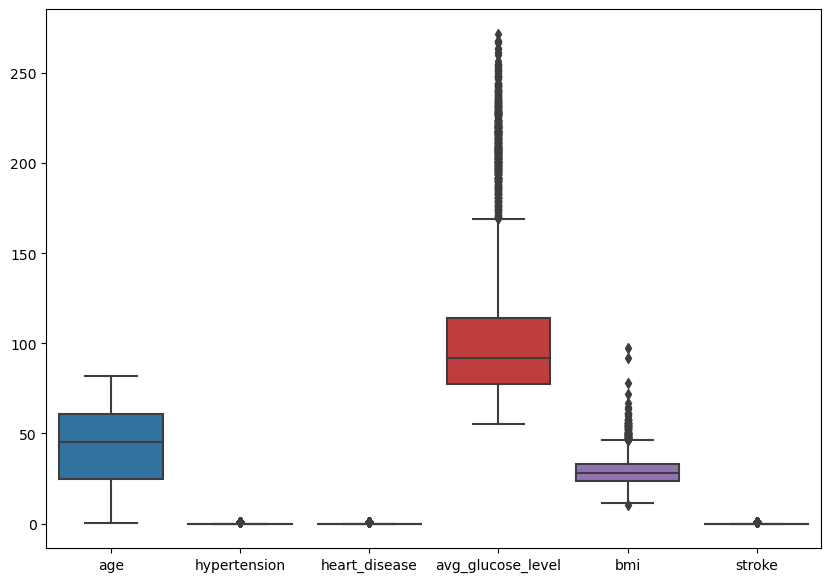

In [253]:
plt.figure(figsize=(10,7))
sns.boxplot(data=health_care)

# Capping outliers

In [254]:
avg_glucose_level_p90=health_care["avg_glucose_level"].quantile(0.9)

In [255]:
avg_glucose_level_p90

192.18100000000007

In [256]:
health_care["avg_glucose_level"].clip(upper=avg_glucose_level_p90,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10620\616762011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_care["avg_glucose_level"].clip(upper=avg_glucose_level_p90,inplace=True)


<Axes: >

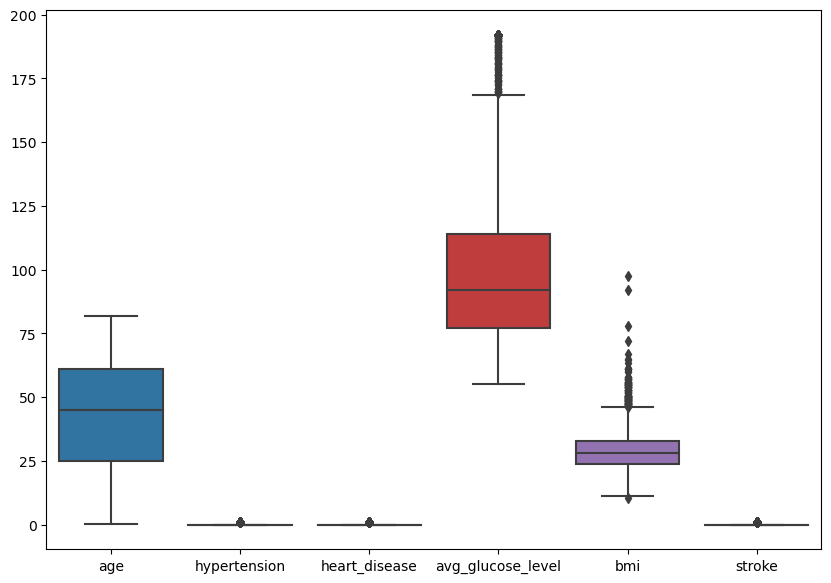

In [257]:
plt.figure(figsize=(10,7))
sns.boxplot(data=health_care)

In [258]:
avg_glucose_level_p90=health_care["avg_glucose_level"].quantile(0.9)
avg_glucose_level_p90

192.1621

In [259]:
health_care99_percentile=health_care["bmi"].quantile(0.99)
health_care["bmi"].clip(upper=health_care99_percentile,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10620\1045150006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_care["bmi"].clip(upper=health_care99_percentile,inplace=True)


<Axes: >

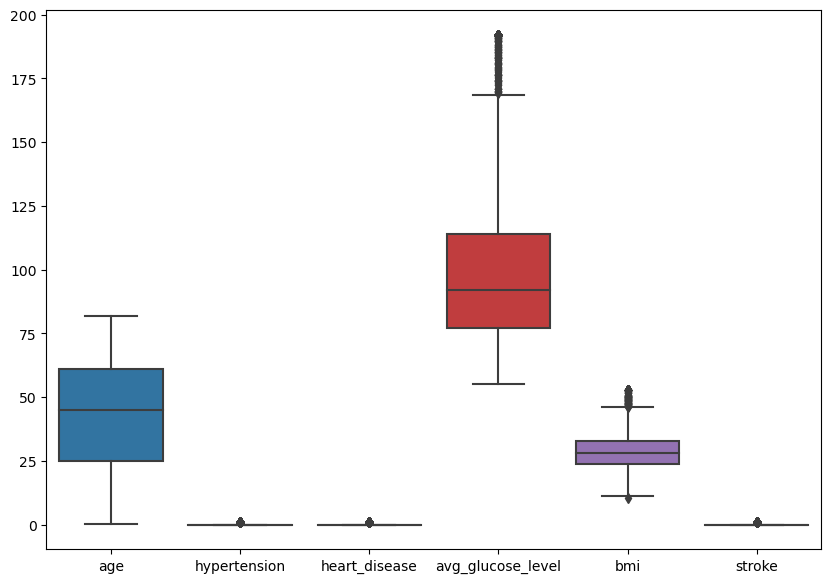

In [260]:
plt.figure(figsize=(10,7))
sns.boxplot(data=health_care)

# Feature Encoding

In [261]:
health_care.dtypes


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [262]:
num_data_cols=health_care.select_dtypes(include=[np.number]).columns.tolist()

In [263]:
num_data_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [264]:
object_data_cols=health_care.select_dtypes(exclude=[np.number]).columns.tolist()

In [265]:
object_data_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [266]:
health_care_num=health_care[num_data_cols]

In [267]:
health_care_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,192.181,36.6,1
1,61.0,0,0,192.181,28.1,1
2,80.0,0,1,105.920,32.5,1
3,49.0,0,0,171.230,34.4,1
4,79.0,1,0,174.120,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.750,28.1,0
5106,81.0,0,0,125.200,40.0,0
5107,35.0,0,0,82.990,30.6,0
5108,51.0,0,0,166.290,25.6,0


In [268]:
health_care_obj=health_care[object_data_cols]

In [269]:
health_care_obj

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [270]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [271]:
health_care_obj=health_care_obj.apply(le.fit_transform)

In [272]:
health_care_obj

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


In [273]:
health_care=pd.concat([health_care_obj,health_care_num],axis=1)

In [274]:
health_care.dtypes

gender                 int32
ever_married           int32
work_type              int32
Residence_type         int32
smoking_status         int32
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

# Feature Importance

In [275]:
pip install --upgrade scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


In [276]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [277]:
train_features,_,test_labels,_=train_test_split(health_care.drop("stroke",axis=1),health_care.stroke,test_size=0.3,random_state=123)

In [278]:
scaler=StandardScaler()
train_features_scaled=scaler.fit_transform(train_features)

In [279]:
XGModel=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
XGModel.fit(train_features_scaled,test_labels)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [280]:
Feature_importance_table=pd.DataFrame(data={'features':train_features.columns,'importance':XGModel.feature_importances_})

In [281]:
Feature_importance_table

,features,importance
0,gender,0.000427
1,ever_married,0.000000
2,work_type,0.002959
3,Residence_type,0.000000
4,smoking_status,0.000641
5,age,0.931443
6,hypertension,0.000582
7,heart_disease,0.003280
8,avg_glucose_level,0.032269
9,bmi,0.028399


In [282]:
Feature_importance_table_sorted=Feature_importance_table.sort_values(by=["importance"])

In [283]:
Feature_importance_table_sorted

,features,importance
1,ever_married,0.000000
3,Residence_type,0.000000
0,gender,0.000427
6,hypertension,0.000582
4,smoking_status,0.000641
2,work_type,0.002959
7,heart_disease,0.003280
9,bmi,0.028399
8,avg_glucose_level,0.032269
5,age,0.931443


<Axes: xlabel='importance', ylabel='features'>

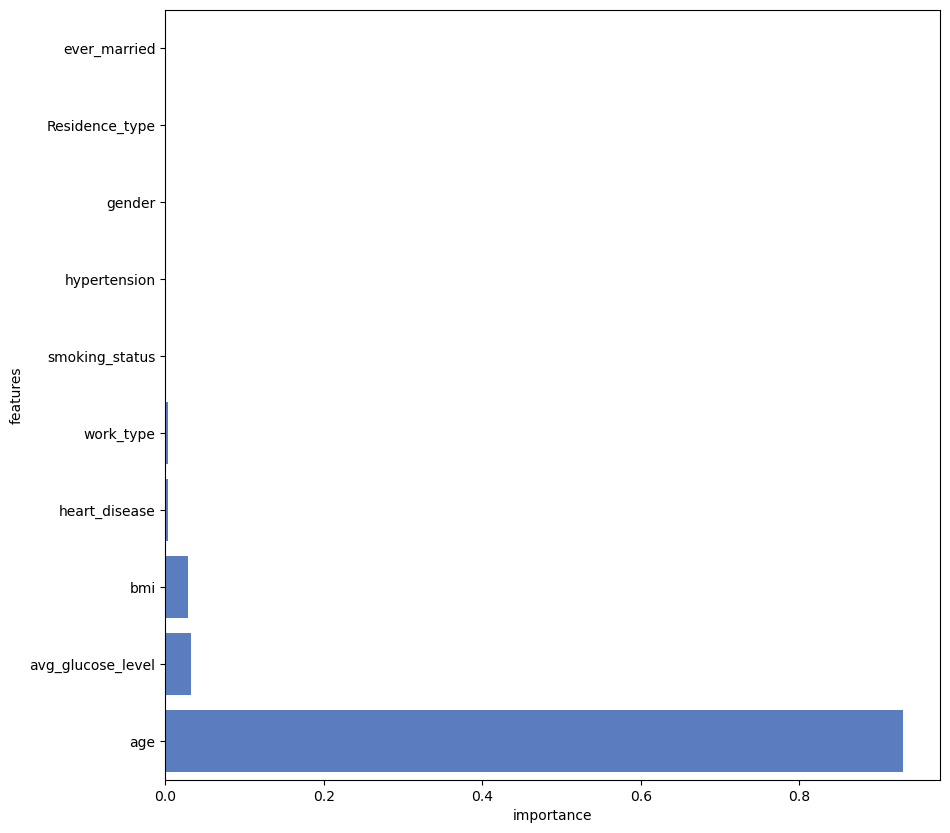

In [284]:
plt.figure(figsize=(10,10))
sns.set_color_codes("muted")
sns.barplot(y="features", x="importance", data=Feature_importance_table_sorted,
            label="Feature Importance", color="b",orient='h')

In [285]:
imp_features=Feature_importance_table_sorted.iloc[-6:].index.tolist()
imp_features

[4, 2, 7, 9, 8, 5]

In [286]:
df_col_names=health_care.columns[imp_features].tolist()

In [287]:
df=health_care[df_col_names]

In [288]:
df

,smoking_status,work_type,heart_disease,bmi,avg_glucose_level,age
0,1,2,1,36.6,192.181,67.0
1,2,3,0,28.1,192.181,61.0
2,2,2,1,32.5,105.920,80.0
3,3,2,0,34.4,171.230,49.0
4,2,3,0,24.0,174.120,79.0
...,...,...,...,...,...,...
5105,2,2,0,28.1,83.750,80.0
5106,2,3,0,40.0,125.200,81.0
5107,2,3,0,30.6,82.990,35.0
5108,1,2,0,25.6,166.290,51.0


# Removing Multicollinearity

The Variance Inflation Factor (VIF) is a statistical metric used to detect multicollinearity in a dataset, especially among independent variables (features). Multicollinearity occurs when two or more independent variables are highly correlated, which can make it difficult for regression models to determine the unique contribution of each variable.

<Axes: >

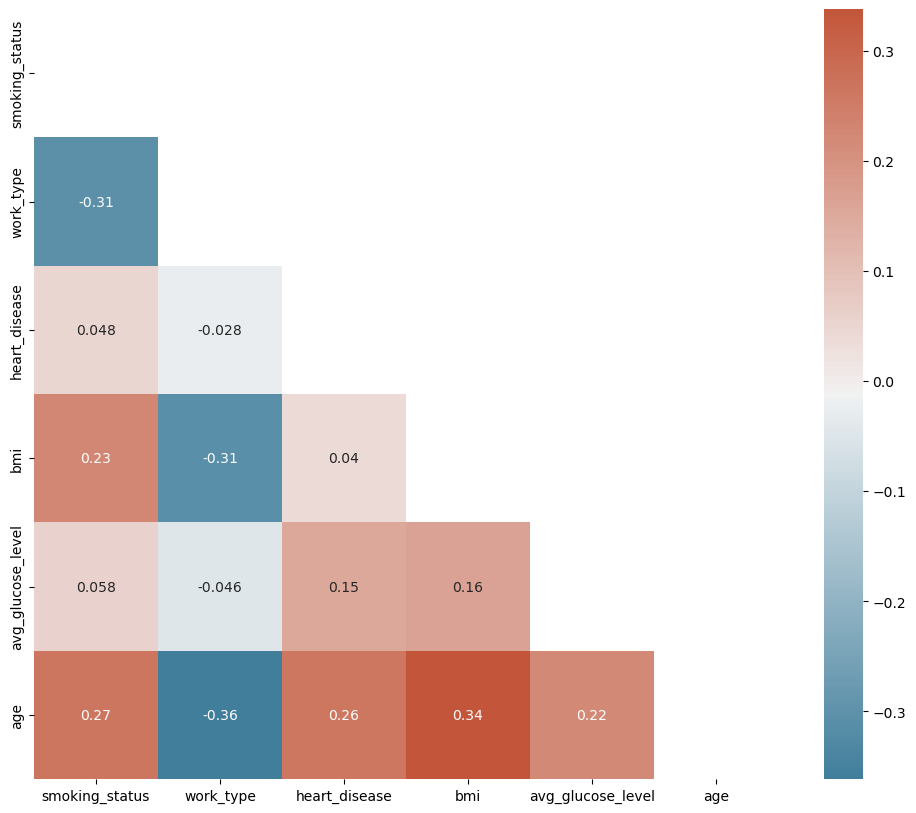

In [289]:
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Calculating VIF for each Variable

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [291]:
vif_scores=pd.Series([vif(df.values,i) for i in range(len(df.columns))])

In [292]:
vif_scores

0     2.945241
1     3.730573
2     1.147791
3    11.512525
4     7.929477
5     6.179157
dtype: float64

In [293]:
vif_scores.index=df.columns

In [294]:
vif_scores

smoking_status        2.945241
work_type             3.730573
heart_disease         1.147791
bmi                  11.512525
avg_glucose_level     7.929477
age                   6.179157
dtype: float64

In [295]:
vif_scores=vif_scores.sort_values(ascending=False)

In [296]:
vif_scores

bmi                  11.512525
avg_glucose_level     7.929477
age                   6.179157
work_type             3.730573
smoking_status        2.945241
heart_disease         1.147791
dtype: float64

**we gonna drop bmi**

In [297]:
df.drop("bmi",axis=1,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10620\1769956735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("bmi",axis=1,inplace=True)


In [298]:
df

,smoking_status,work_type,heart_disease,avg_glucose_level,age
0,1,2,1,192.181,67.0
1,2,3,0,192.181,61.0
2,2,2,1,105.920,80.0
3,3,2,0,171.230,49.0
4,2,3,0,174.120,79.0
...,...,...,...,...,...
5105,2,2,0,83.750,80.0
5106,2,3,0,125.200,81.0
5107,2,3,0,82.990,35.0
5108,1,2,0,166.290,51.0


In [299]:
vif_scores=pd.Series([vif(df.values,i)for i in range(len(df.columns))])

In [300]:
vif_scores.index=df.columns

In [301]:
vif_scores

smoking_status       2.687027
work_type            3.212568
heart_disease        1.126064
avg_glucose_level    6.523505
age                  4.843078
dtype: float64

In [302]:
final_columns=df.columns

In [303]:
final_columns

Index(['smoking_status', 'work_type', 'heart_disease', 'avg_glucose_level',
       'age'],
      dtype='object')

In [304]:
df[final_columns].head(5)

,smoking_status,work_type,heart_disease,avg_glucose_level,age
0,1,2,1,192.181,67.0
1,2,3,0,192.181,61.0
2,2,2,1,105.920,80.0
3,3,2,0,171.230,49.0
4,2,3,0,174.120,79.0


In [305]:
df.loc[3571]

smoking_status        2.00
work_type             0.00
heart_disease         0.00
avg_glucose_level    85.17
age                  53.00
Name: 3571, dtype: float64

# these are the features we gonna use for our model fitting

# Model Fitting

In [306]:
from statsmodels.formula import api as smf

In [307]:
df1=df

In [308]:
df1["stroke"]=health_care["stroke"]

C:\Users\PC\AppData\Local\Temp\ipykernel_10620\1885937195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["stroke"]=health_care["stroke"]


In [309]:
df1

,smoking_status,work_type,heart_disease,avg_glucose_level,age,stroke
0,1,2,1,192.181,67.0,1
1,2,3,0,192.181,61.0,1
2,2,2,1,105.920,80.0,1
3,3,2,0,171.230,49.0,1
4,2,3,0,174.120,79.0,1
...,...,...,...,...,...,...
5105,2,2,0,83.750,80.0,0
5106,2,3,0,125.200,81.0,0
5107,2,3,0,82.990,35.0,0
5108,1,2,0,166.290,51.0,0


In [310]:
train_data,test_data=train_test_split(df1,test_size=0.3,random_state=123)

In [311]:
model_sm=smf.logit('stroke~smoking_status+work_type+heart_disease+avg_glucose_level+age',data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.157364
         Iterations 9


In [312]:
print(model_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3571
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.2143
Time:                        01:28:33   Log-Likelihood:                -562.89
converged:                       True   LL-Null:                       -716.41
Covariance Type:            nonrobust   LLR p-value:                 3.088e-64
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.8746      0.486    -16.194      0.000      -8.828      -6.922
smoking_status        0.0240      0.084      0.288      0.773      -0.140       0.188
work_type            -0.

#    Intercept:
        Coefficient: -7.8746
        Interpretation: When all predictors are 0, the log-odds of stroke = 1 are -7.87. This value shifts the baseline probability.

    smoking_status:
        Coefficient: 0.0240 (not statistically significant, p = 0.773)
        Interpretation: Smoking status has no meaningful impact on the likelihood of stroke in this model.

    work_type:
        Coefficient: -0.8647 (not statistically significant, p = 0.454)
        Interpretation: Work type also doesn’t significantly influence stroke likelihood.

    heart_disease:
        Coefficient: 0.3757 (p = 0.081, borderline significant)
        Interpretation: Having heart disease increases the log-odds of stroke slightly, but this effect is weak.

    avg_glucose_level:
        Coefficient: 0.0061 (p = 0.000, statistically significant)
        Interpretation: For every unit increase in glucose level, the log-odds of stroke increase by 0.0061. This is a strong predictor.

    age:
        Coefficient: 0.0747 (p = 0.000, statistically significant)
        Interpretation: Age is a highly significant predictor. For every one-year increase in age, the log-odds of stroke increase by 0.0747.

Interpretation of Significant Predictors:

    avg_glucose_level and age are statistically significant:
        These predictors strongly influence the probability of a stroke.
        For example, an increase in glucose levels or age increases the risk.

    smoking_status and work_type are not statistically significant:
        These variables do not have a meaningful impact in predicting strokes in this model.

    heart_disease is borderline significant:
        It might have some effect, but additional data or adjustments may clarify its role.

# Now we will use sklearn

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [314]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(("stroke"),axis=1),df.stroke,test_size=0.3,random_state=123)

In [315]:
model = LogisticRegression(random_state=123, max_iter = 10000, penalty='l2')

In [316]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=123)

# Predicting probabilities

In [317]:
model.predict_proba(X_test)

array([[0.99881247, 0.00118753],
       [0.99745784, 0.00254216],
       [0.9865014 , 0.0134986 ],
       ...,
       [0.99369078, 0.00630922],
       [0.99857479, 0.00142521],
       [0.97271372, 0.02728628]])

In [318]:
train_scores=pd.concat([pd.Series(y_train,name="y_true").reset_index(drop=True),pd.Series(model.predict_proba(X_train)[::,1],name="y_predicted").reset_index(drop=True)],axis=1)

In [319]:
train_scores

,y_true,y_predicted
0,0,0.003291
1,0,0.007424
2,0,0.023160
3,0,0.043691
4,0,0.000627
...,...,...
3572,0,0.005454
3573,0,0.101002
3574,0,0.042311
3575,0,0.047272


In [320]:
test_scores=pd.concat([pd.Series(y_test,name="y_true").reset_index(drop=True),pd.Series(model.predict_proba(X_test)[::,1],name="y_predicted").reset_index(drop=True)],axis=1)

In [321]:
test_scores

,y_true,y_predicted
0,0,0.001188
1,0,0.002542
2,0,0.013499
3,0,0.020792
4,0,0.001421
...,...,...
1528,0,0.003580
1529,0,0.014224
1530,0,0.006309
1531,0,0.001425


# Model Evaluation

### Roc Curve

In [322]:
from sklearn.metrics import roc_curve, auc

In [323]:
fpr_train,tpr_train,thresholds=roc_curve(train_scores.y_true, train_scores.y_predicted)

In [324]:
roc_auc_train = auc(fpr_train, tpr_train)

In [325]:
fpr_test,tpr_test,thresholds=roc_curve(test_scores.y_true,test_scores.y_predicted)

In [326]:
roc_auc_test=auc(fpr_test,tpr_test)

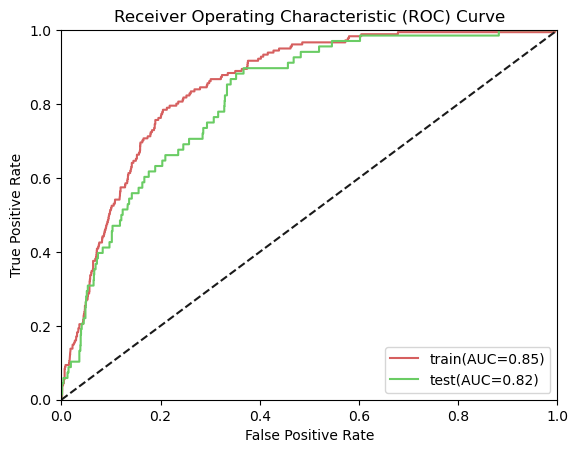

In [327]:
plt.figure()  
plt.plot(fpr_train, tpr_train,'r',label="train(AUC=%0.2f)"%roc_auc_train)
plt.plot(fpr_test,tpr_test,'g',label="test(AUC=%0.2f)"%roc_auc_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1,],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Train AUC = 0.852316: The model has a good ability to distinguish between classes in the training dataset.
Test AUC = 0.816166: The model also performs well on the test dataset but slightly worse than on the training set.

# Calibration Curve

In [328]:
from sklearn.calibration import calibration_curve

In [329]:
xaxis_train,yaxis_train=calibration_curve(train_scores.y_true,train_scores.y_predicted,n_bins=10,strategy='uniform')

In [330]:
xaxis_test,yaxis_test=calibration_curve(test_scores.y_true,test_scores.y_predicted,n_bins=10,strategy='uniform')

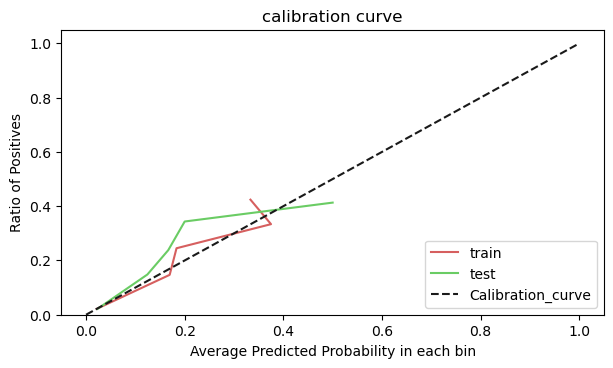

In [331]:
plt.figure(figsize=(7,3.7))
plt.title("calibration curve")
plt.ylabel ('Ratio of Positives')
plt.xlabel('Average Predicted Probability in each bin')
plt.plot(xaxis_train,yaxis_train,'r',label="%s"%('train'))
plt.plot(xaxis_test,yaxis_test,'g',label="%s"%('test'))
plt.plot([0,1],[0,1],'k--',label="Calibration_curve")
plt.ylim([0,1.05])
plt.legend(loc="lower right")

# Decile Analysis

In [332]:
cd_train,_=calibration_curve(train_scores.y_true,train_scores.y_predicted,n_bins=10,strategy='uniform')

In [333]:
cd_test,_=calibration_curve(test_scores.y_true,test_scores.y_predicted,n_bins=10,strategy='uniform')

In [334]:
decile_comparaison=pd.concat([pd.Series(np.flip(np.arange(1,11)),name="decile"),pd.Series(cd_train,name='train'),
                              pd.Series(cd_test,name='test')],axis=1)

In [335]:
decile_comparaison

,decile,train,test
0,10,0.021658,0.023071
1,9,0.169533,0.124352
2,8,0.183432,0.166667
3,7,0.375000,0.200000
4,6,0.333333,0.500000
5,5,NaN,NaN
6,4,NaN,NaN
7,3,NaN,NaN
8,2,NaN,NaN
9,1,NaN,NaN


In [336]:
decile_comparaison.sort_values(by='decile',ascending=False).reset_index(drop=True)

,decile,train,test
0,10,0.021658,0.023071
1,9,0.169533,0.124352
2,8,0.183432,0.166667
3,7,0.375000,0.200000
4,6,0.333333,0.500000
5,5,NaN,NaN
6,4,NaN,NaN
7,3,NaN,NaN
8,2,NaN,NaN
9,1,NaN,NaN


In [337]:
decile_comparaison.decile

0    10
1     9
2     8
3     7
4     6
5     5
6     4
7     3
8     2
9     1
Name: decile, dtype: int32

<Axes: xlabel='decile'>

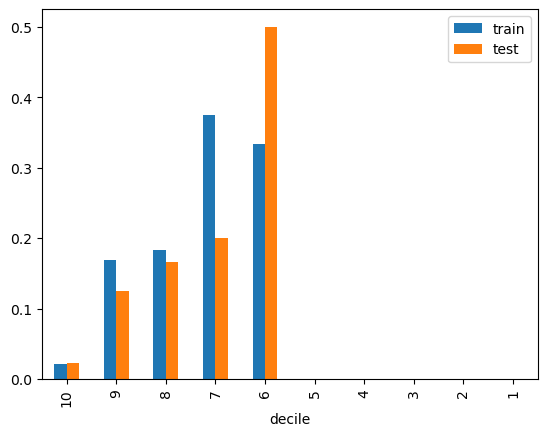

In [338]:
decile_comparaison.plot.bar(x="decile")

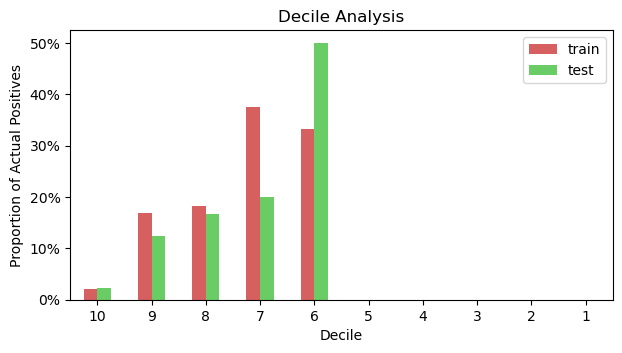

In [339]:
decile_comparaison.plot.bar(x='decile', stacked=False,
subplots=False, figsize=(7,3.5), color=['r','g'])

plt.title('Decile Analysis')
plt.xlabel('Decile')
plt.ylabel('Proportion of Actual Positives')
plt.xticks(rotation='horizontal')
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

## KS Statistics

In [340]:
def ks_score(y_true, y_score):
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

In [341]:
ks_score(train_scores.y_true,train_scores.y_predicted)

0.5798778543492832

In [342]:
ks_score(test_scores.y_true,test_scores.y_predicted)

0.5301345111423409

A KS score of 0.5798 means your model has reasonably good discriminatory power. It suggests the model can effectively distinguish between the positive and negative classes.

## Calculating other Metrics

In [343]:
train_scores['y_pred_']=model.predict(X_train)
test_scores['y_pred_']=model.predict(X_test)

In [344]:
train_scores['y_pred_']

0       0
1       0
2       0
3       0
4       0
       ..
3572    0
3573    0
3574    0
3575    0
3576    0
Name: y_pred_, Length: 3577, dtype: int64

In [345]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
def performance_metrics(y_true: pd.Series,
y_pred: pd.Series,
set_col_name: str = 'score') -> pd.DataFrame:
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1__score=f1_score(y_true,y_pred)
    
    metrics=pd.DataFrame({'metric':['accuracy','precision','recall','f1_score'],
                         set_col_name:[accuracy,precision,recall,f1__score]})
    
    return metrics

In [349]:
performance_metrics(train_scores.y_true,train_scores.y_pred_)

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,metric,score
0,accuracy,0.949399
1,precision,0.000000
2,recall,0.000000
3,f1_score,0.000000
